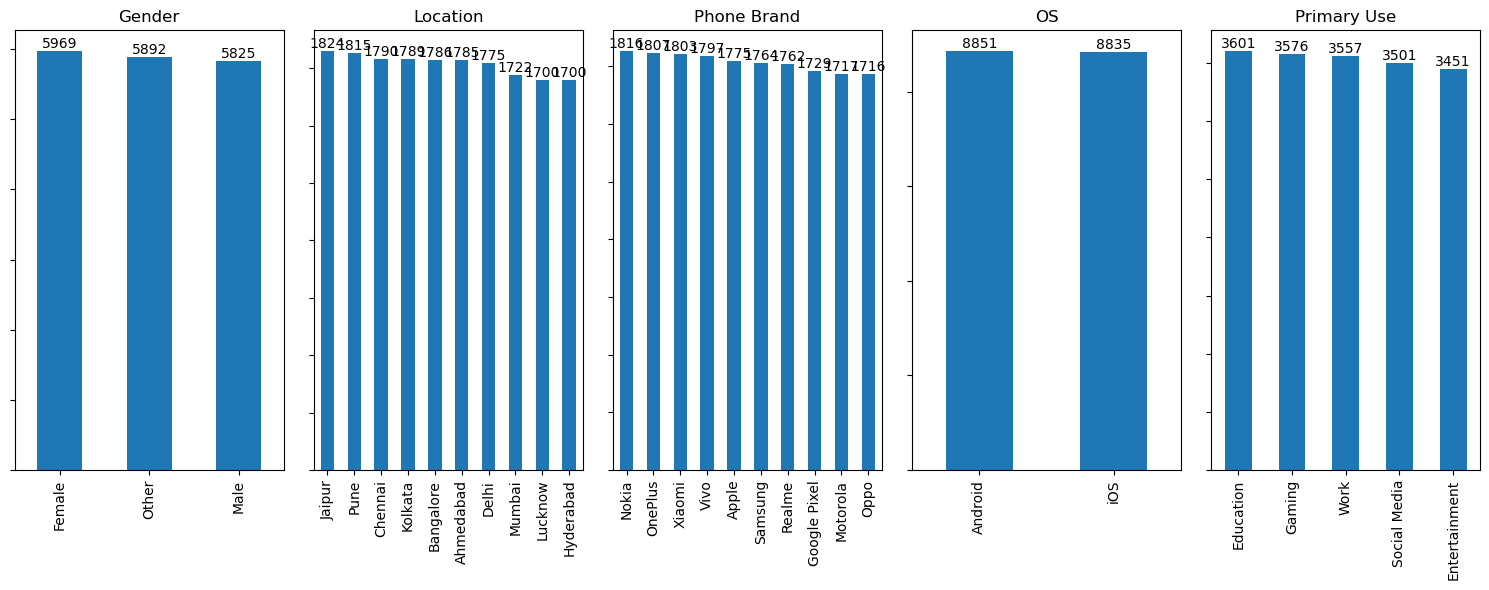

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import warnings
warnings.filterwarnings("ignore")

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder, MinMaxScaler

from sklearn.model_selection import train_test_split

from imblearn.over_sampling import SMOTE

from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

def bar_labels(axes, rotation=0, location="edge"):
    for container in axes.containers:
        axes.bar_label(container, rotation=rotation, label_type=location)
    axes.set_ylabel("")
    axes.set_xlabel("")
    axes.set_yticklabels(())

rfc = RandomForestClassifier()
abc = AdaBoostClassifier()
gbc = GradientBoostingClassifier()
etc = ExtraTreesClassifier()
svc = SVC()
lgr = LogisticRegression()
xgbc = XGBClassifier()
lgbc = LGBMClassifier(verbose=-100)

models_cl = [rfc, abc, gbc, etc,
         lgr, svc, xgbc, lgbc]

names_cl = ["Random Forest", "Ada Boost", "Gradient Boosting", "Extra Trees",
        "Logistic Regression", "Support Vector Machine", "XGBoost", "LightGBM"]

def training_classification():
    scores, reports, cms = [], dict(), dict()

    for i, j in zip(models_cl, names_cl):
        i.fit(x_train, y_train)
        pred = i.predict(x_test)
        scores += [accuracy_score(pred, y_test)*100]
        reports[j] = classification_report(pred, y_test)
        cms[j] = confusion_matrix(pred, y_test)
    fig, axes = plt.subplots()
    dd = pd.DataFrame({"score": scores}, index=names_cl)
    dd = dd.sort_values("score", ascending=False)
    dd["score"] = round(dd["score"], 2)
    dd["score"].plot(kind="bar", ax=axes)
    bar_labels(axes)
    plt.tight_layout()
    plt.show()

    index = 0

    for _ in range(2):
        fig, axes = plt.subplots(ncols=4, figsize=(15, 6))
        for i in range(4):
            sns.heatmap(cms[dd.index[index]], annot=True, fmt='d', ax=axes[i])
            axes[i].set_title("{}: {}%".format(dd.index[index], dd.iloc[index, 0]))
            index += 1
        plt.tight_layout()
        plt.show()

    for i in dd.index:
        print("*"*30)
        print(i)
        print(reports[i])

        print("\n\n")

df = pd.read_csv(r"C:\Users\dell\Desktop\MyDocs\Docs\MK\phone_usage_india.csv")

df.drop("User ID", axis=1, inplace=True)

cats = ["Gender", "Location", "Phone Brand", "OS", "Primary Use"]

nums = [i for i in df.columns if i not in cats]

fig, axes = plt.subplots(ncols=5, figsize=(15, 6))

for i, j in enumerate(cats):
    df[j].value_counts()[:10].plot(kind="bar", ax=axes[i])
    bar_labels(axes[i])
    axes[i].set_title(j.replace('_', ' '))
plt.tight_layout()
plt.show()

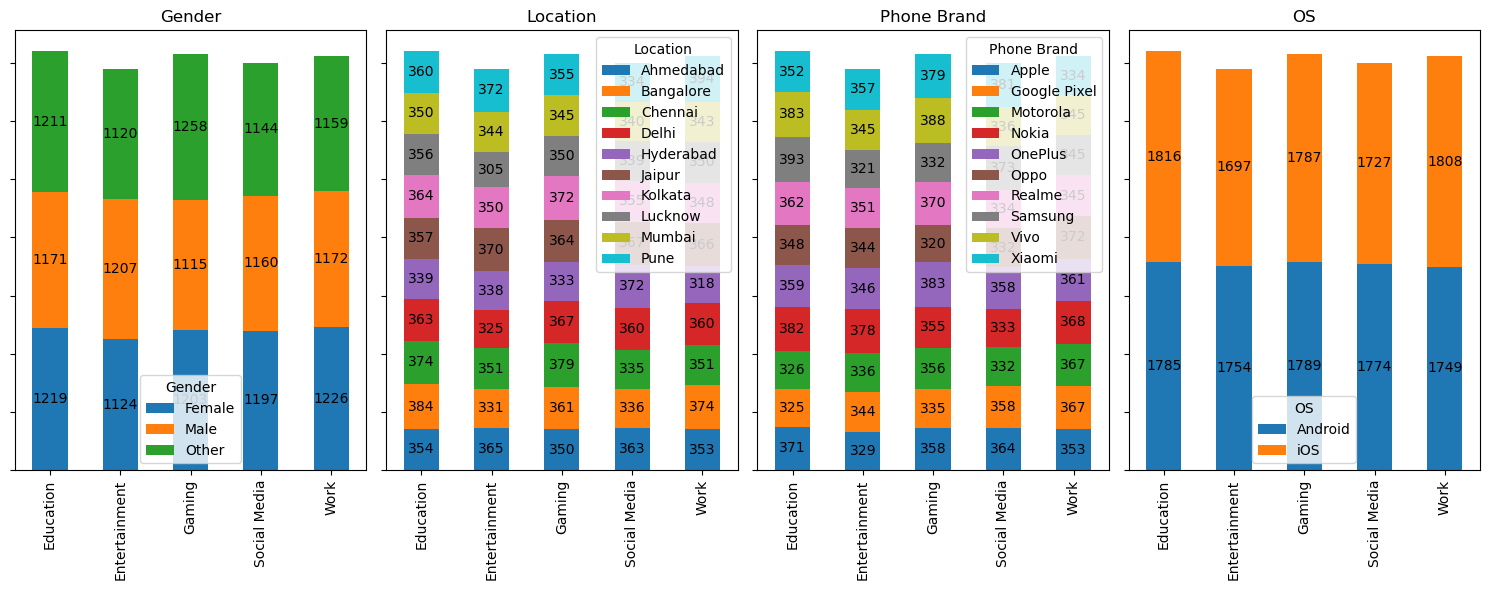

In [2]:
fig, axes = plt.subplots(ncols=4, figsize=(15, 6))

grouped = df.groupby(cats[-1])

for i, j in enumerate(cats[:-1]):
    grouped[j].value_counts().unstack().plot(kind="bar", stacked=True, ax=axes[i])
    bar_labels(axes[i], 0, "center")
    axes[i].set_title(j.replace('_', ' '))
plt.tight_layout()
plt.show()

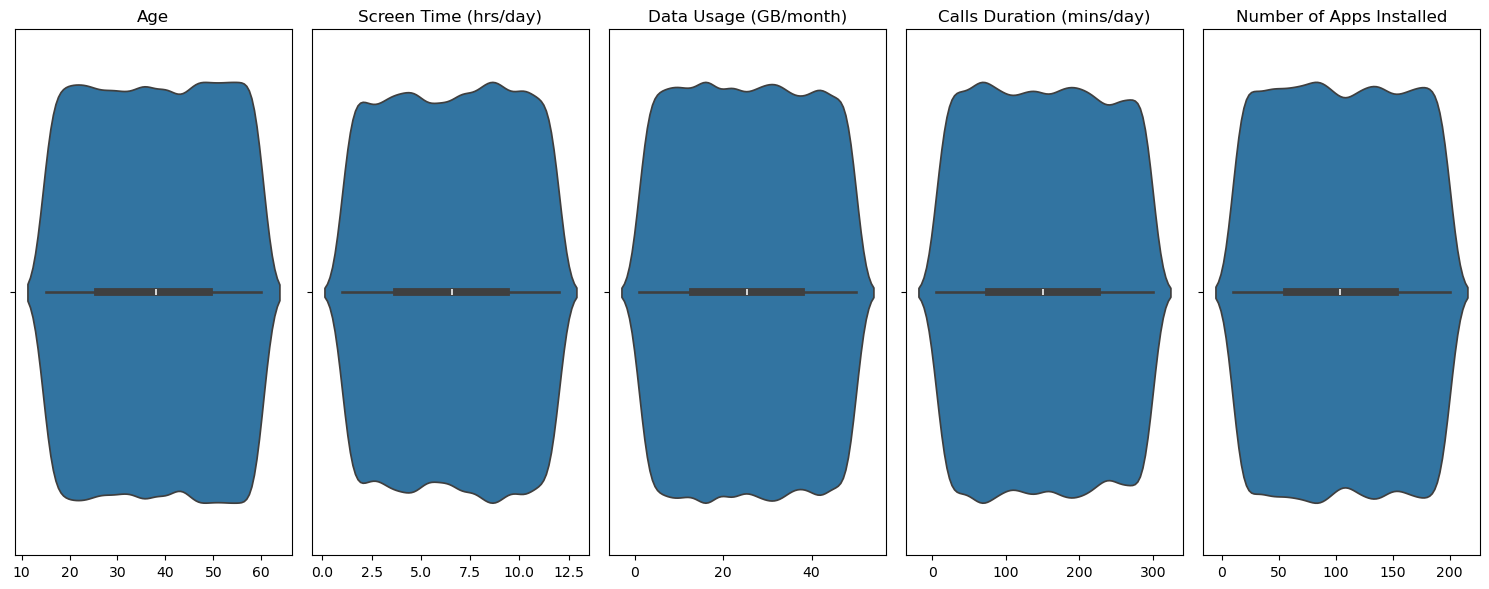

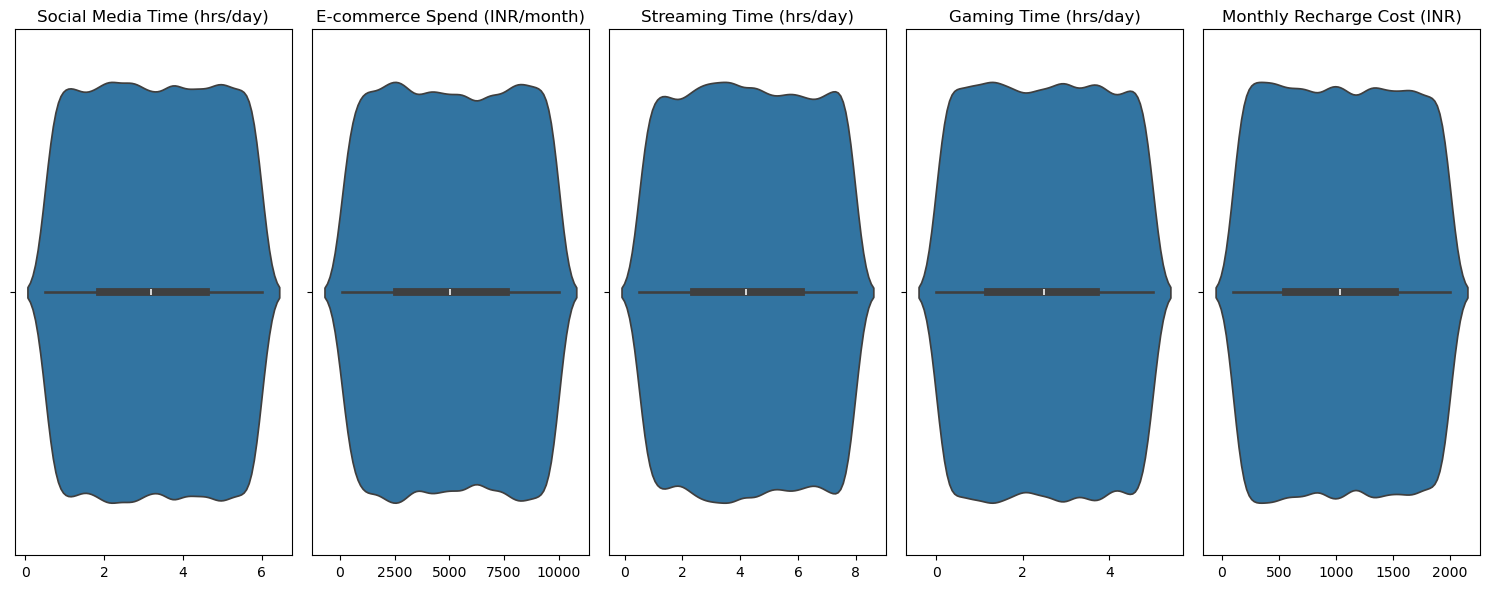

In [3]:
index = 0

for _ in range(2):
    fig, axes = plt.subplots(ncols=5, figsize=(15, 6))
    for i in range(5):
        sns.violinplot(df, x=nums[index], ax=axes[i])
        axes[i].set_ylabel("")
        axes[i].set_xlabel("")
        axes[i].set_title(nums[index].replace('_', ' '))
        index+=1
    plt.tight_layout()
    plt.show()

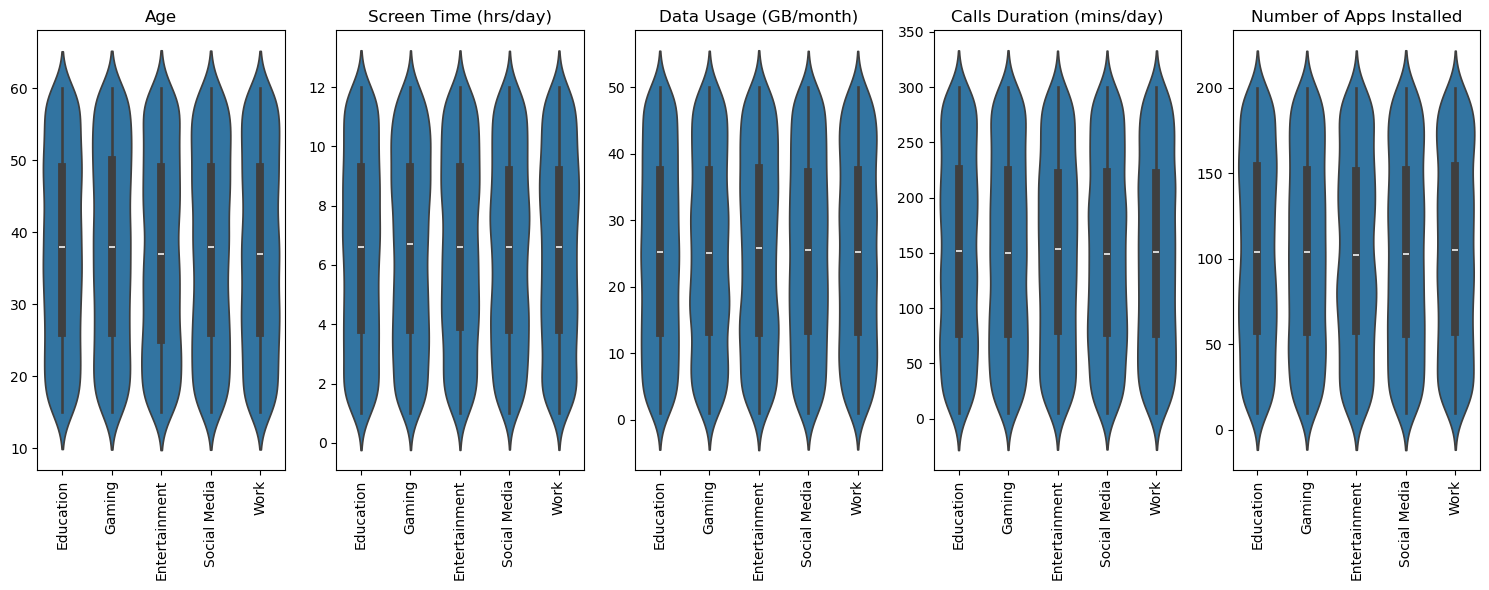

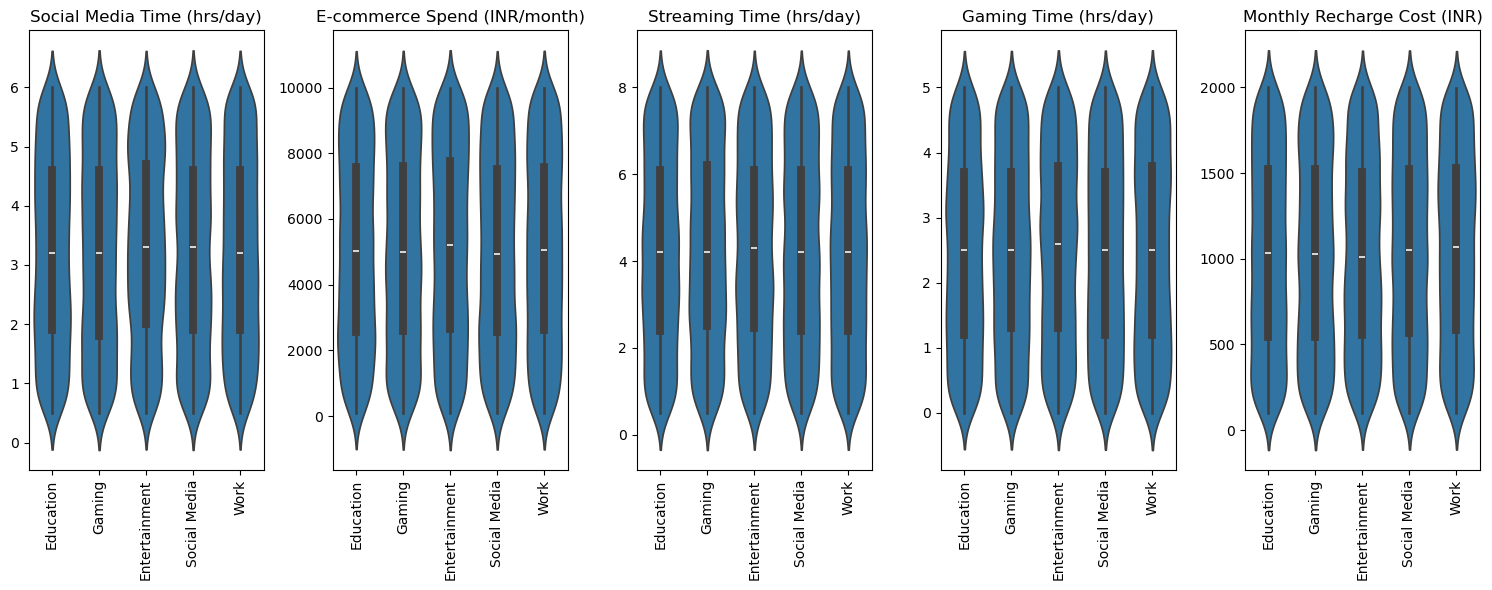

In [4]:
index = 0

for _ in range(2):
    fig, axes = plt.subplots(ncols=5, figsize=(15, 6))
    for i in range(5):
        sns.violinplot(df, x=cats[-1], y=nums[index], ax=axes[i])
        axes[i].set_ylabel("")
        axes[i].set_xlabel("")
        axes[i].set_title(nums[index].replace('_', ' '))
        axes[i].set_xticklabels(axes[i].get_xticklabels(), rotation=90)
        index+=1
    plt.tight_layout()
    plt.show()

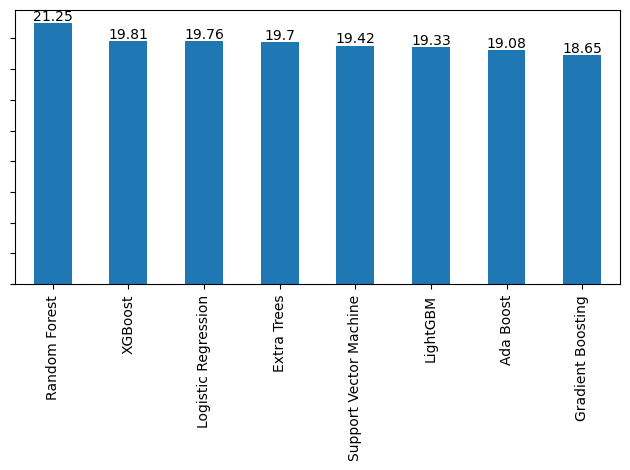

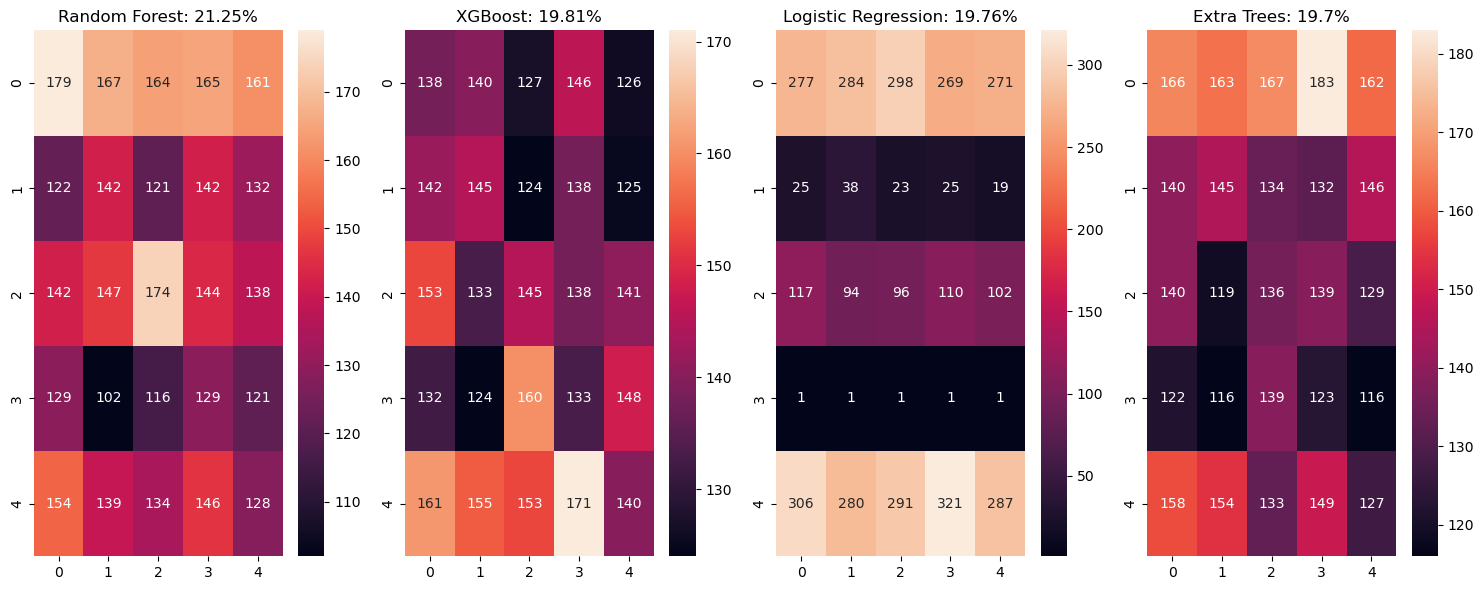

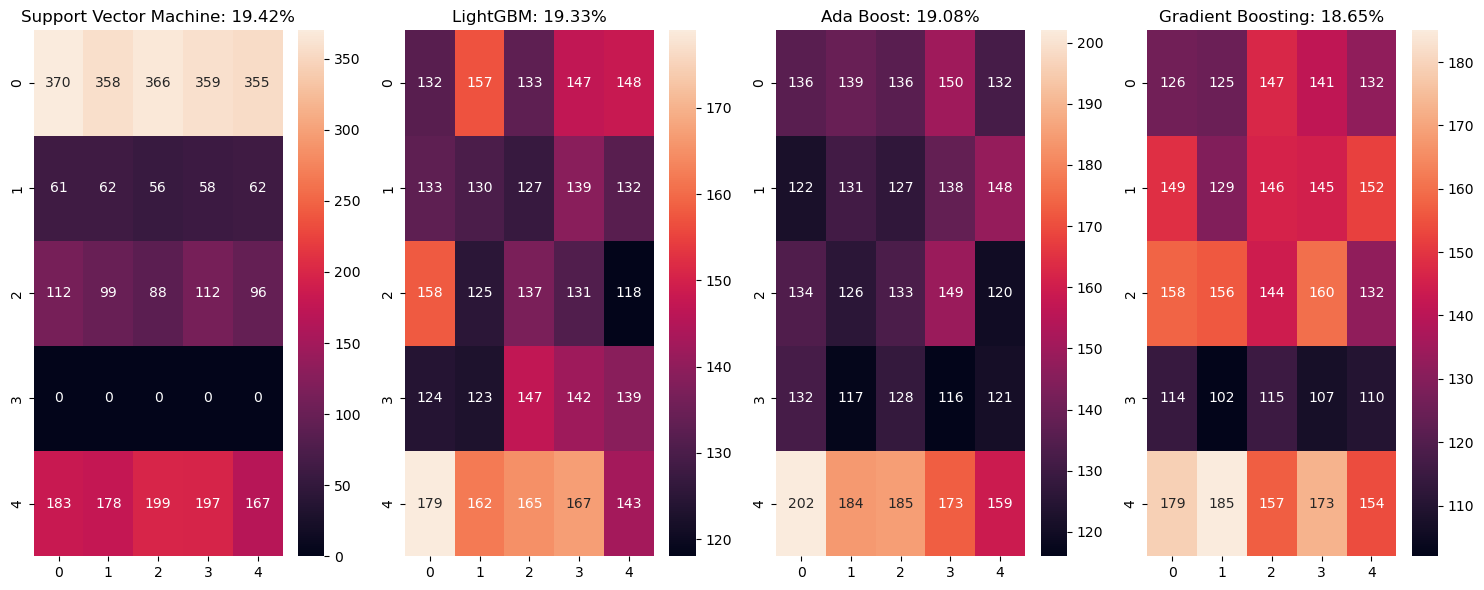

******************************
Random Forest
              precision    recall  f1-score   support

           0       0.25      0.21      0.23       836
           1       0.20      0.22      0.21       659
           2       0.25      0.23      0.24       745
           3       0.18      0.22      0.20       597
           4       0.19      0.18      0.19       701

    accuracy                           0.21      3538
   macro avg       0.21      0.21      0.21      3538
weighted avg       0.22      0.21      0.21      3538




******************************
XGBoost
              precision    recall  f1-score   support

           0       0.19      0.20      0.20       677
           1       0.21      0.22      0.21       674
           2       0.20      0.20      0.20       710
           3       0.18      0.19      0.19       697
           4       0.21      0.18      0.19       780

    accuracy                           0.20      3538
   macro avg       0.20      0.20      0.20 

In [5]:
for i in cats:
    df[i] = LabelEncoder().fit_transform(df[i].values)

scaler = MinMaxScaler()

x = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=42, test_size=0.2)

training_classification()